In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install sweetviz
!pip install pandas_profiling
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **For Book Data**

In [9]:
book = pd.read_csv("book.csv" , encoding='latin1')
book.head()

Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6

In [10]:
# Checking for null values
book.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [11]:
# Checking for the information of the data
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [12]:
# Checking the correlation
book.corr()

Unnamed: 0   User.ID  Book.Rating
Unnamed: 0     1.000000 -0.406308    -0.000228
User.ID       -0.406308  1.000000    -0.041523
Book.Rating   -0.000228 -0.041523     1.000000

<Axes: title={'center': 'correaltion of the book data'}>

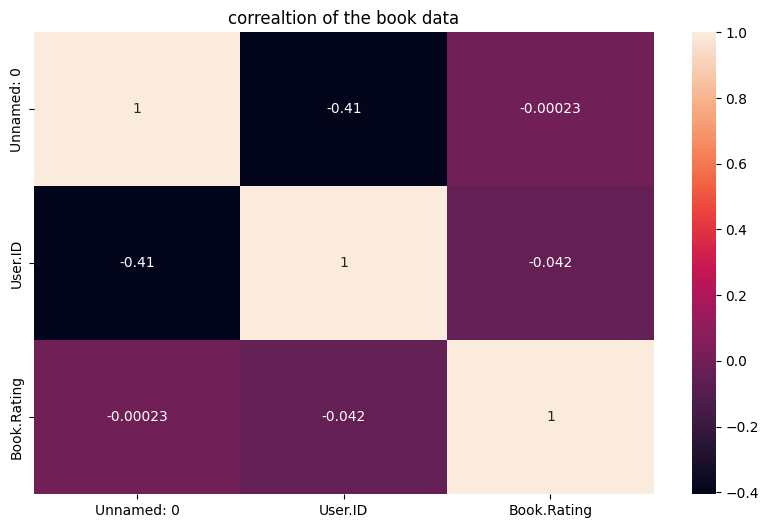

In [13]:
plt.figure(figsize=(10,6))
plt.title("correaltion of the book data")
sns.heatmap(data=book.corr(), annot=True)

### **Apriori Algorithm**

In [ ]:
frequent_itemsets = apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets

support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (CookBks, ChildBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (RefBks, ChildBks)
13   0.1625             (ArtBks, ChildBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (CookBks, YouthBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (ArtBks, YouthBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (CookBks, DoItYBks)
20   0.1525              (CookBks, RefBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (GeogBks, CookBks)
23   0.1135            (CookBks, ItalCook)
24   0.1055             (RefBks, DoItYBks)
25   0.1235             (ArtBks, DoItYBks)
26   0.1325            (GeogBks, DoItYBks)
27   0.1105              (GeogBks, RefBks)
28   0.1275              (GeogBks, ArtBks)
29   0.1290  (CookBks, YouthBks, ChildBks)
30   0.1460  (CookBks, DoItYBks, ChildBks)
31   0.1225    (CookBks, RefBks, ChildBks)
32   0.1265    (ArtBks, CookBks, ChildBks)
33   0.1495   (GeogBks, CookBks, ChildBks)
34   0.1045  (GeogBks, DoItYBks, ChildBks)
35   0.1020    (GeogBks, ArtBks, ChildBks)
36   0.1015    (ArtBks, CookBks, DoItYBks)
37   0.1085   (GeogBks, CookBks, DoItYBks)
38   0.1035     (ArtBks, CookBks, GeogBks)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head(9)

antecedents          consequents  antecedent support  \
28            (CookBks)           (ItalCook)              0.4310   
29           (ItalCook)            (CookBks)              0.1135   
78   (ArtBks, ChildBks)            (GeogBks)              0.1625   
79            (GeogBks)   (ArtBks, ChildBks)              0.2760   
85             (ArtBks)  (CookBks, DoItYBks)              0.2410   
84  (CookBks, DoItYBks)             (ArtBks)              0.1875   
99            (GeogBks)    (ArtBks, CookBks)              0.2760   
94    (ArtBks, CookBks)            (GeogBks)              0.1670   
97             (ArtBks)   (GeogBks, CookBks)              0.2410   

    consequent support  support  confidence      lift  leverage  conviction  
28              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  
29              0.4310   0.1135    1.000000  2.320186  0.064582         inf  
78              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628  
79              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
85              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674  
84              0.2410   0.1015    0.541333  2.246196  0.056313    1.654797  
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
94              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327

An leverage value of 0 indicates independence. Range will be [-1 1]

A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [ ]:
rules.sort_values('lift',ascending = False)[0:20]

antecedents          consequents  antecedent support  \
28            (CookBks)           (ItalCook)              0.4310   
29           (ItalCook)            (CookBks)              0.1135   
78   (ArtBks, ChildBks)            (GeogBks)              0.1625   
79            (GeogBks)   (ArtBks, ChildBks)              0.2760   
85             (ArtBks)  (CookBks, DoItYBks)              0.2410   
84  (CookBks, DoItYBks)             (ArtBks)              0.1875   
99            (GeogBks)    (ArtBks, CookBks)              0.2760   
94    (ArtBks, CookBks)            (GeogBks)              0.1670   
97             (ArtBks)   (GeogBks, CookBks)              0.2410   
96   (GeogBks, CookBks)             (ArtBks)              0.1925   
53  (CookBks, ChildBks)             (RefBks)              0.2560   
56             (RefBks)  (CookBks, ChildBks)              0.2145   
77  (GeogBks, ChildBks)             (ArtBks)              0.1950   
80             (ArtBks)  (GeogBks, ChildBks)              0.2410   
87           (DoItYBks)    (ArtBks, CookBks)              0.2820   
82    (ArtBks, CookBks)           (DoItYBks)              0.1670   
67            (GeogBks)  (CookBks, ChildBks)              0.2760   
66  (CookBks, ChildBks)            (GeogBks)              0.2560   
91            (GeogBks)  (CookBks, DoItYBks)              0.2760   
90  (CookBks, DoItYBks)            (GeogBks)              0.1875   

    consequent support  support  confidence      lift  leverage  conviction  
28              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  
29              0.4310   0.1135    1.000000  2.320186  0.064582         inf  
78              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628  
79              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
85              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674  
84              0.2410   0.1015    0.541333  2.246196  0.056313    1.654797  
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
94              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
53              0.2145   0.1225    0.478516  2.230842  0.067588    1.506277  
56              0.2560   0.1225    0.571096  2.230842  0.067588    1.734652  
77              0.2410   0.1020    0.523077  2.170444  0.055005    1.591452  
80              0.1950   0.1020    0.423237  2.170444  0.055005    1.395719  
87              0.1670   0.1015    0.359929  2.155264  0.054406    1.301418  
82              0.2820   0.1015    0.607784  2.155264  0.054406    1.830626  
67              0.2560   0.1495    0.541667  2.115885  0.078844    1.623273  
66              0.2760   0.1495    0.583984  2.115885  0.078844    1.740319  
91              0.1875   0.1085    0.393116  2.096618  0.056750    1.338806  
90              0.2760   0.1085    0.578667  2.096618  0.056750    1.718354

In [ ]:
rules[rules.lift>1]

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2            (CookBks)          (ChildBks)              0.4310   
3           (ChildBks)           (CookBks)              0.4230   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (GeogBks, ArtBks)           (CookBks)              0.1275   
96  (GeogBks, CookBks)            (ArtBks)              0.1925   
97            (ArtBks)  (GeogBks, CookBks)              0.2410   
98           (CookBks)   (GeogBks, ArtBks)              0.4310   
99           (GeogBks)   (ArtBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
2               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
3               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
..                 ...      ...         ...       ...       ...         ...  
95              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812  
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
98              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237  
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  

[100 rows x 9 columns]

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

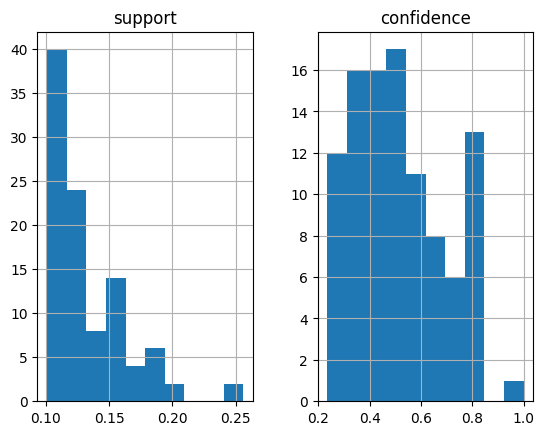

In [ ]:
# visualization of obtained rule
rules[['support','confidence']].hist()

<Axes: >

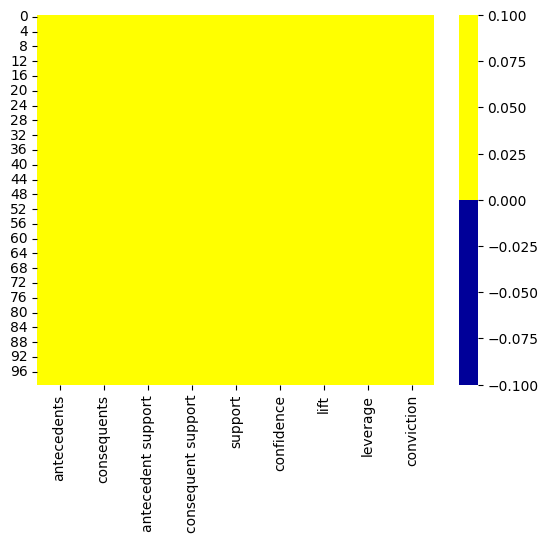

In [ ]:
import seaborn as sns
cols = rules.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(rules[cols].isnull(),
            cmap=sns.color_palette(colours))  

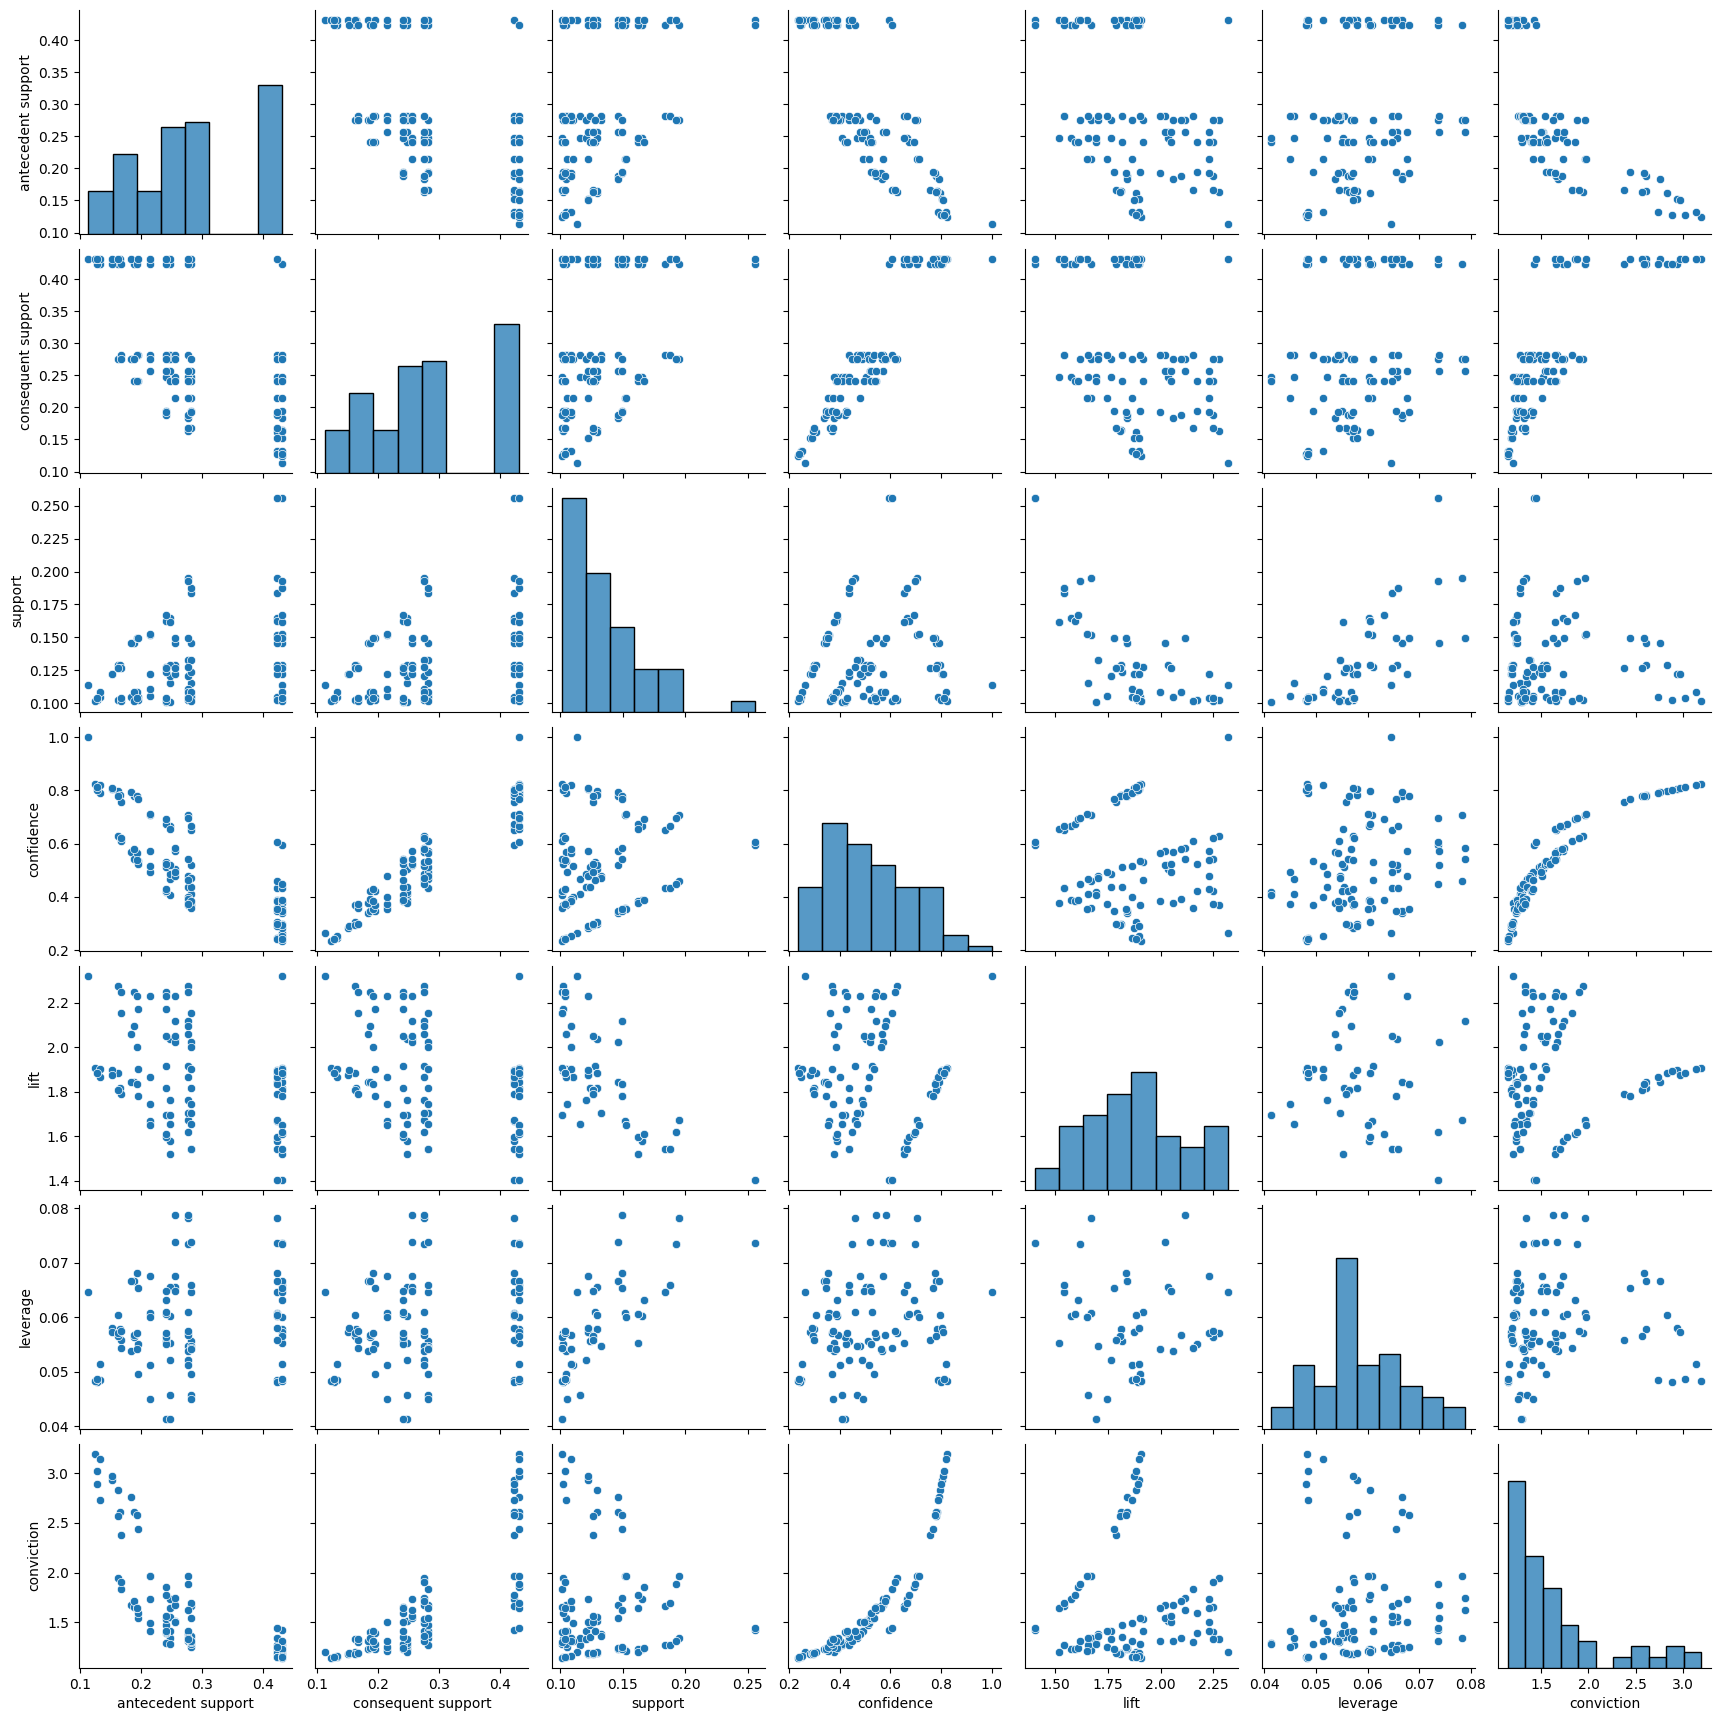

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(rules.iloc[:,0:10]) 

In [ ]:
import pandas_profiling as pp
import sweetviz as sv 

<ipython-input-44-e35a22f70b50>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
EDA_report= pp.ProfileReport(rules)
EDA_report.to_file(output_file='report.html') 
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.9/dist-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot specify integer `bins` when input data contains infinity')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='support', ylabel='leverage'>

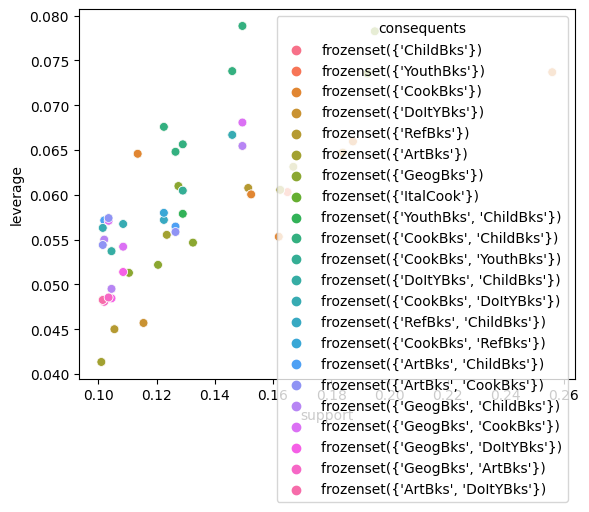

In [ ]:
sns.scatterplot(data=rules,x='support',y='leverage',hue='consequents',s = 40)

### **For My Movies Data**

In [ ]:
Mmovies = pd.read_csv("my_movies.csv")
Mmovies.head()

V1       V2             V3          V4     V5  Sixth Sense  \
0  Sixth Sense    LOTR1  Harry Potter1  Green Mile  LOTR2            1   
1    Gladiator  Patriot     Braveheart         NaN    NaN            0   
2        LOTR1    LOTR2            NaN         NaN    NaN            0   
3    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   
4    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   

   Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  \
0          0      1              1        0      1              0     0   
1          1      0              0        1      0              0     0   
2          0      1              0        0      1              0     0   
3          1      0              0        1      0              0     0   
4          1      0              0        1      0              0     0   

   Braveheart  Green Mile  
0           0           1  
1           1           0  
2           0           0  
3           0           0  
4           0           0

In [ ]:
mymovie = Mmovies.iloc[:,5:]
mymovie.head()

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0

In [ ]:
mymovie.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

# **Apriori Algorithm**

In [ ]:
frequent_itemsets = apriori(mymovie, min_support=0.2, use_colnames=True)
frequent_itemsets

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Sixth Sense, Green Mile)
10      0.6               (Gladiator, Patriot)
11      0.2                     (LOTR1, LOTR2)
12      0.4  (Sixth Sense, Gladiator, Patriot)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules
rules.sort_values('lift',ascending = False).head(11)

antecedents               consequents  antecedent support  \
8                    (LOTR1)                   (LOTR2)                 0.2   
9                    (LOTR2)                   (LOTR1)                 0.2   
4              (Sixth Sense)              (Green Mile)                 0.6   
5               (Green Mile)             (Sixth Sense)                 0.2   
6                (Gladiator)                 (Patriot)                 0.7   
7                  (Patriot)               (Gladiator)                 0.6   
11    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
14               (Gladiator)    (Sixth Sense, Patriot)                 0.7   
10  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
15                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
4                  0.2      0.2    0.333333  1.666667      0.08         1.2  
5                  0.6      0.2    1.000000  1.666667      0.08         inf  
6                  0.6      0.6    0.857143  1.428571      0.18         2.8  
7                  0.7      0.6    1.000000  1.428571      0.18         inf  
11                 0.7      0.4    1.000000  1.428571      0.12         inf  
14                 0.4      0.4    0.571429  1.428571      0.12         1.4  
10                 0.6      0.4    0.800000  1.333333      0.10         2.0  
15                 0.5      0.4    0.666667  1.333333      0.10         1.5  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8

An leverage value of 0 indicates independence. Range will be [-1 1]

A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

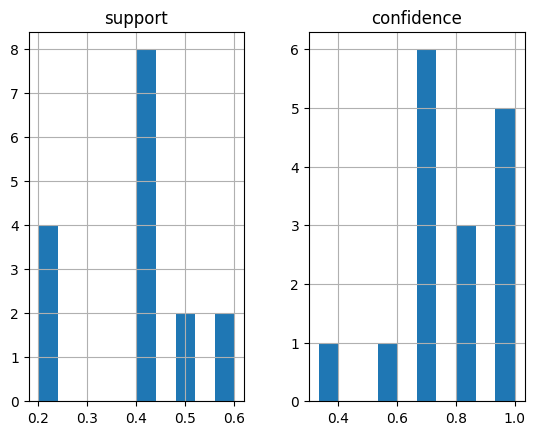

In [ ]:
# visualization of obtained rule
rules[['support','confidence']].hist()

array([[<Axes: title={'center': 'lift'}>,
        <Axes: title={'center': 'leverage'}>]], dtype=object)

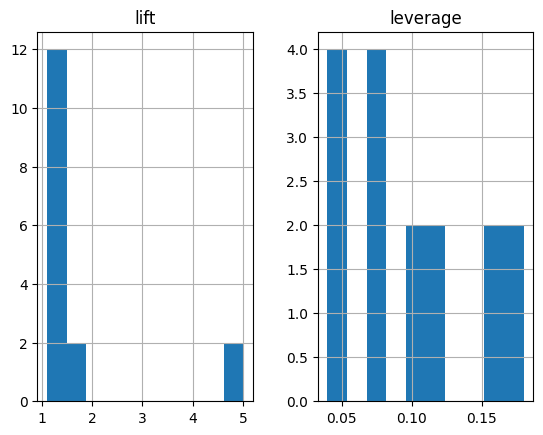

In [ ]:
rules[['lift','leverage']].hist()

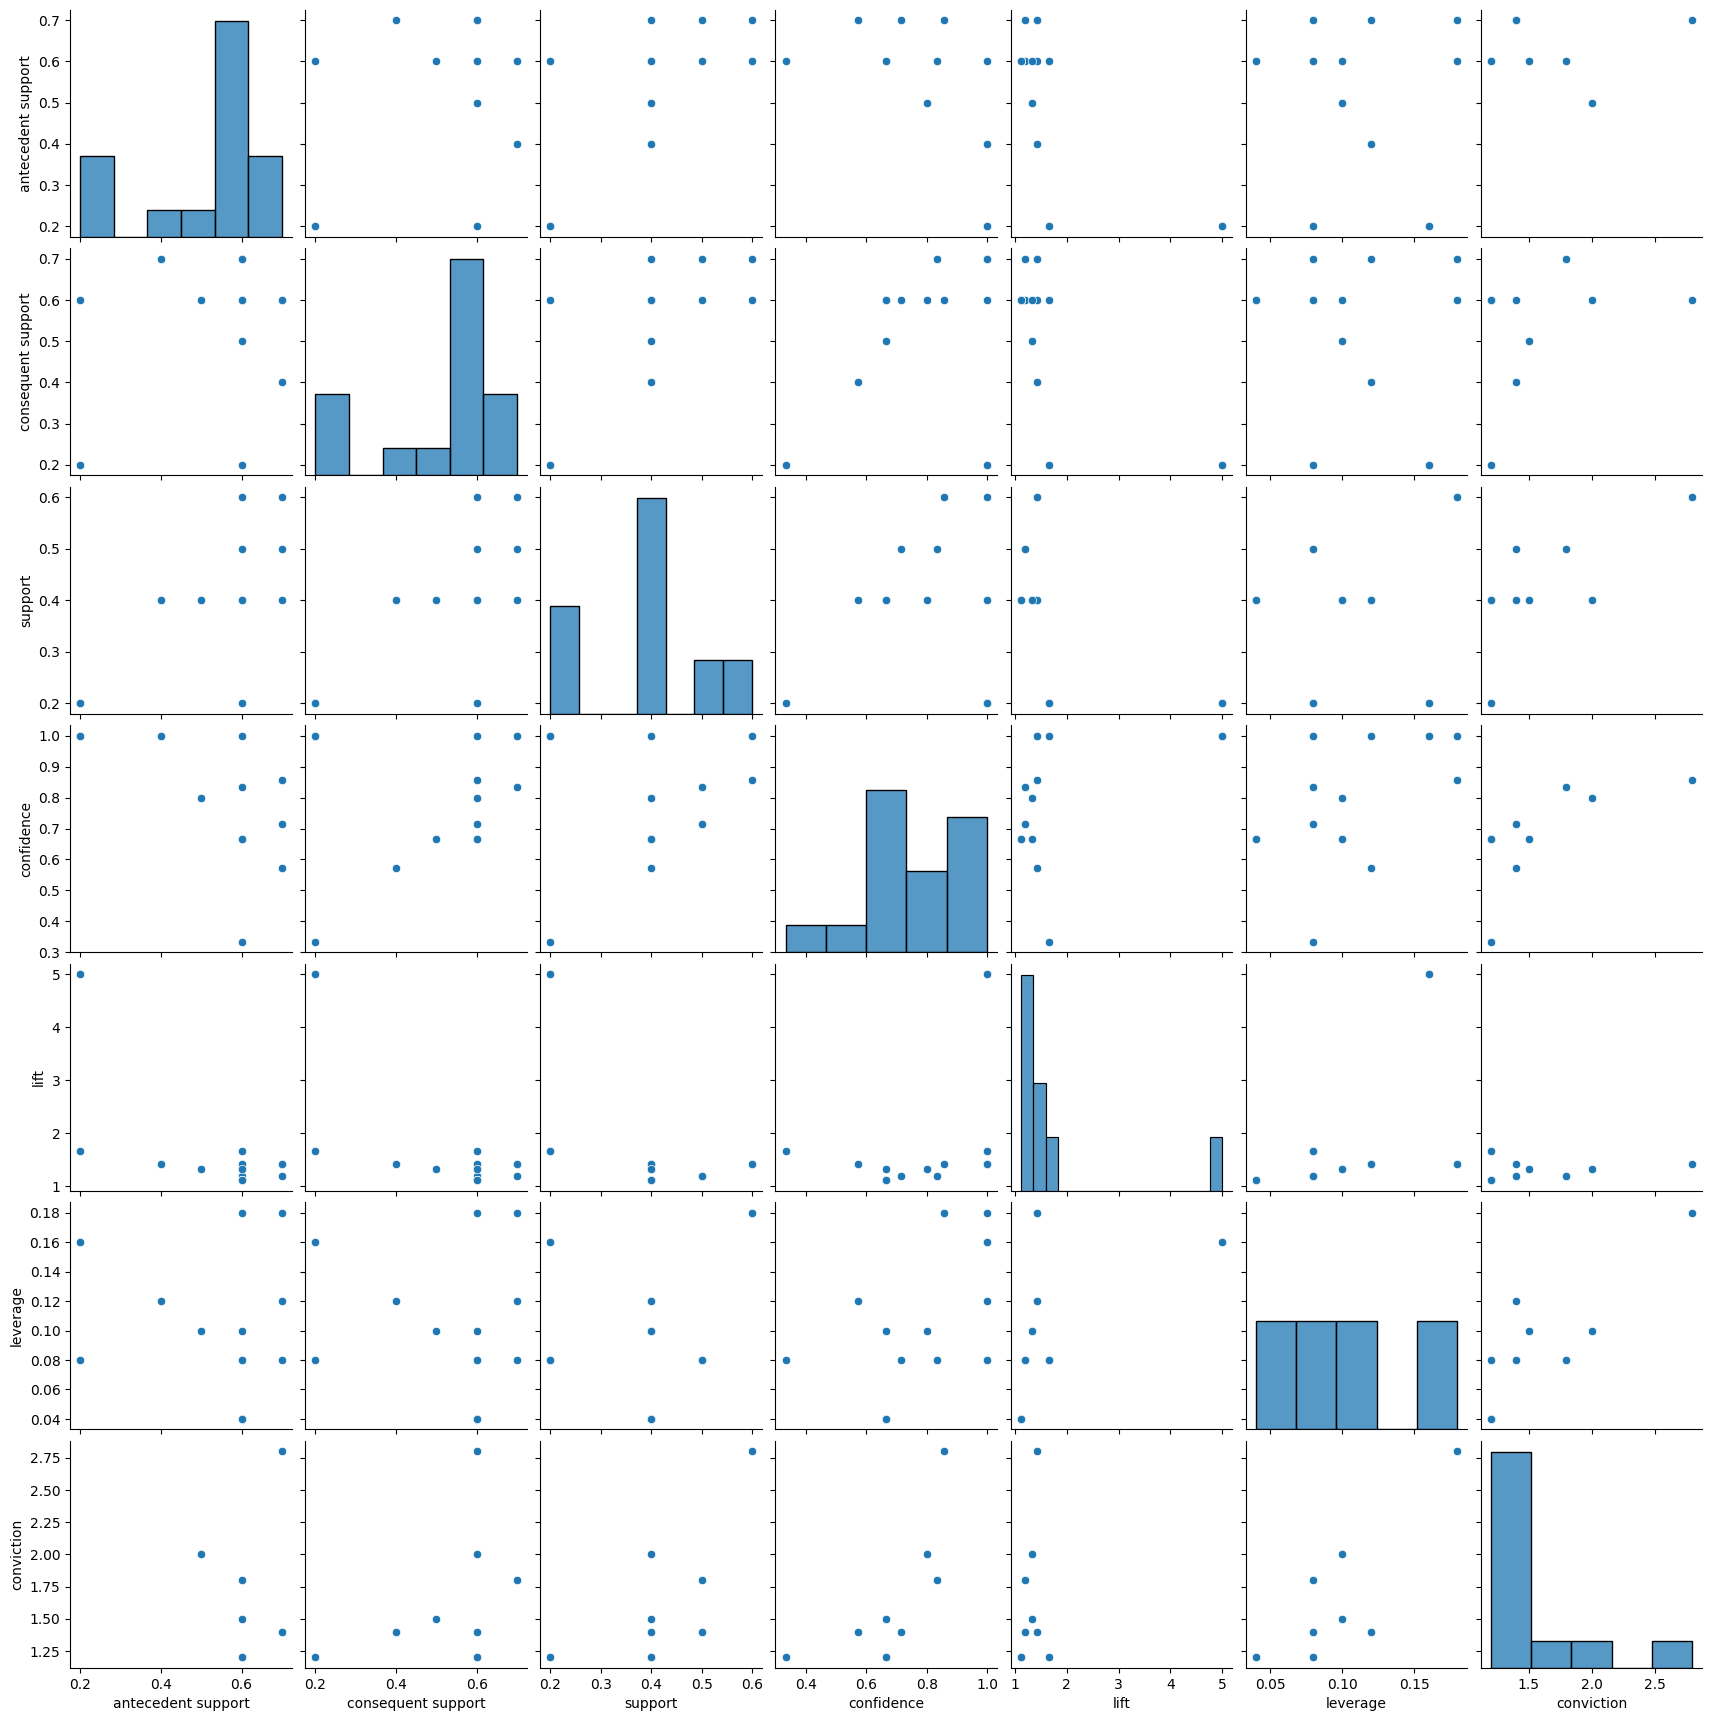

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(rules.iloc[:,0:11]) 

In [ ]:
EDA_report= pp.ProfileReport(rules)
EDA_report.to_file(output_file='report.html') 
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.9/dist-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot specify integer `bins` when input data contains infinity')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='support', ylabel='leverage'>

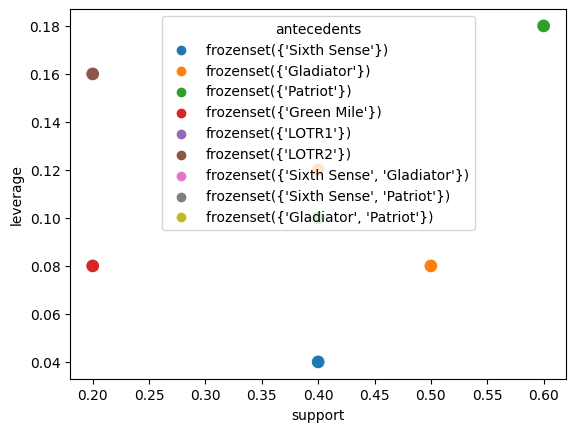

In [ ]:
sns.scatterplot(data=rules,x='support',y='leverage',hue='antecedents',s = 100)